In [1]:
import pandas as pd
import numpy as np

#AIDU에 있는 데이터를 활용하기 위해서 4가지 패키지 임포트
from aicentro.session import Session
sacp_session = Session(verify=False)
from aicentro.framework.framework import BaseFramework as SacpFrm
sacp_framework = SacpFrm(session=sacp_session)

## <b>학습데이터 불러오기</b>
---

In [2]:
df = pd.read_csv('TrainData.csv',delimiter=',')

In [3]:
df

,url_len,url_num_hyphens_dom,url_num_dom_token,url_path_len,url_filename_len,url_longest_dom_token_len,url_average_dom_token_len,url_tld,url_domain_len,url_hostname_len,...,html_num_tags('form'),html_num_tags('a'),html_num_tags('small'),html_num_tags('span'),html_num_tags('input'),html_num_tags('applet'),html_num_tags('img'),html_num_tags('video'),html_num_tags('audio'),Result_v1
0,15,0,4.0,0.0,0,3,3.000000,0,15.0,15,...,0,0,0,0,0,0,0,0,0,benign
1,96,0,3.0,82.0,68,6,4.000000,1,14.0,14,...,0,4,0,1,0,0,1,0,0,benign
2,12,0,3.0,0.0,0,5,3.333333,0,12.0,12,...,1,62,0,47,1,0,81,1,0,benign
3,35,0,3.0,18.0,10,7,5.000000,1,17.0,17,...,0,48,0,76,0,0,0,0,0,benign
4,38,0,3.0,17.0,16,12,6.333333,1,21.0,21,...,0,0,0,1,0,0,3,0,0,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6103,37,0,3.0,24.0,12,6,3.666667,1,13.0,13,...,0,0,0,0,0,0,0,0,0,benign
6104,37,0,3.0,24.0,12,6,3.666667,1,13.0,13,...,0,0,0,0,0,0,0,0,0,benign
6105,37,0,3.0,24.0,12,6,3.666667,1,13.0,13,...,0,0,0,0,0,0,0,0,0,benign
6106,37,0,3.0,24.0,12,6,3.666667,1,13.0,13,...,0,0,0,0,0,0,0,0,0,benign


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6108 entries, 0 to 6107
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   url_len                    6108 non-null   int64  
 1   url_num_hyphens_dom        6108 non-null   int64  
 2   url_num_dom_token          6105 non-null   float64
 3   url_path_len               6107 non-null   float64
 4   url_filename_len           6108 non-null   int64  
 5   url_longest_dom_token_len  6108 non-null   int64  
 6   url_average_dom_token_len  6108 non-null   float64
 7   url_tld                    6108 non-null   int64  
 8   url_domain_len             6105 non-null   float64
 9   url_hostname_len           6108 non-null   int64  
 10  url_num_dots               6108 non-null   int64  
 11  url_num_underscores        6107 non-null   float64
 12  url_num_equals             6107 non-null   float64
 13  url_num_slashes            6107 non-null   float

In [5]:
df.describe()

,url_len,url_num_hyphens_dom,url_num_dom_token,url_path_len,url_filename_len,url_longest_dom_token_len,url_average_dom_token_len,url_tld,url_domain_len,url_hostname_len,...,html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('small'),html_num_tags('span'),html_num_tags('input'),html_num_tags('applet'),html_num_tags('img'),html_num_tags('video'),html_num_tags('audio')
count,6108.000000,6108.000000,6105.000000,6107.000000,6108.000000,6108.000000,6108.000000,6108.000000,6105.000000,6108.000000,...,6108.000000,6108.000000,6108.000000,6108.000000,6108.000000,6108.000000,6108.0,6108.000000,6108.000000,6108.000000
mean,53.709070,0.413720,2.862408,28.479941,15.638507,12.198428,6.813073,0.901441,20.353317,20.305501,...,1.016699,1.019810,65.520138,0.142436,25.166667,5.577112,0.0,13.848396,0.014571,0.022430
std,82.141842,0.830238,0.769080,76.689496,69.214863,7.638118,3.442360,0.298094,9.287801,9.313965,...,0.226136,1.456458,333.460714,2.253323,241.011547,10.290290,0.0,51.091158,0.146853,0.369973
min,5.000000,0.000000,2.000000,0.000000,0.000000,2.000000,1.500000,0.000000,4.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,24.000000,0.000000,2.000000,1.000000,0.000000,7.000000,4.333333,1.000000,14.000000,14.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000
50%,36.000000,0.000000,3.000000,12.000000,6.000000,10.000000,6.000000,1.000000,17.000000,17.000000,...,1.000000,1.000000,16.000000,0.000000,2.000000,3.000000,0.0,3.000000,0.000000,0.000000
75%,55.000000,1.000000,3.000000,30.000000,12.000000,16.000000,8.500000,1.000000,24.000000,24.000000,...,1.000000,1.000000,52.000000,0.000000,16.000000,8.000000,0.0,9.000000,0.000000,0.000000
max,1837.000000,14.000000,12.000000,1816.000000,1771.000000,63.000000,31.500000,1.000000,109.000000,109.000000,...,3.000000,57.000000,13451.000000,113.000000,16457.000000,349.000000,0.0,1885.000000,4.000000,11.000000


## <b>데이터 탐색/정제</b>


### <b>Q1. 중복 데이터 제거</b>
---
 - 중복된 행데이터 삭제

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5189 entries, 0 to 5999
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   url_len                    5189 non-null   int64  
 1   url_num_hyphens_dom        5189 non-null   int64  
 2   url_num_dom_token          5189 non-null   float64
 3   url_path_len               5189 non-null   float64
 4   url_filename_len           5189 non-null   int64  
 5   url_longest_dom_token_len  5189 non-null   int64  
 6   url_average_dom_token_len  5189 non-null   float64
 7   url_tld                    5189 non-null   int64  
 8   url_domain_len             5189 non-null   float64
 9   url_hostname_len           5189 non-null   int64  
 10  url_num_dots               5189 non-null   int64  
 11  url_num_underscores        5189 non-null   float64
 12  url_num_equals             5189 non-null   float64
 13  url_num_slashes            5189 non-null   float

In [42]:
# 중복 데이터 제거 : drop_duplicates()
df = df.drop_duplicates() #작성하는 코드 #중복여부를 코드로 볼수 있는 방법은 없나

#같은 코드 df.drop_duplicateds(inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5189 entries, 0 to 5999
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   url_len                    5189 non-null   int64  
 1   url_num_hyphens_dom        5189 non-null   int64  
 2   url_num_dom_token          5189 non-null   float64
 3   url_path_len               5189 non-null   float64
 4   url_filename_len           5189 non-null   int64  
 5   url_longest_dom_token_len  5189 non-null   int64  
 6   url_average_dom_token_len  5189 non-null   float64
 7   url_tld                    5189 non-null   int64  
 8   url_domain_len             5189 non-null   float64
 9   url_hostname_len           5189 non-null   int64  
 10  url_num_dots               5189 non-null   int64  
 11  url_num_underscores        5189 non-null   float64
 12  url_num_equals             5189 non-null   float64
 13  url_num_slashes            5189 non-null   float

### <b>Q2. 텍스트와 범주형 특성 처리</b>
---
 - replace() 함수를 이용한 텍스트와 범주형 특성 처리
 - 참고사이트 : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html

#### <b>replace() 함수 사용 예</b>
---

In [44]:
import pandas as pd

df_ex = pd.DataFrame({'name': ['Alice','Bob','Charlie','Dave','Ellen','Frank'],
                   'age': [24,42,18,68,24,30],
                   'state': ['NY','CA','CA','TX','CA','NY'],
                   'point': [64,24,70,70,88,57]}
                  )

print(df_ex)

      name  age state  point
0    Alice   24    NY     64
1      Bob   42    CA     24
2  Charlie   18    CA     70
3     Dave   68    TX     70
4    Ellen   24    CA     88
5    Frank   30    NY     57


In [45]:
df_ex['state'].replace({'CA':'California','NY':'NewYork'}, inplace=True)
print(df_ex)

      name  age       state  point
0    Alice   24     NewYork     64
1      Bob   42  California     24
2  Charlie   18  California     70
3     Dave   68          TX     70
4    Ellen   24  California     88
5    Frank   30     NewYork     57


#### <b>텍스트와 범주형 특성 처리 실습</b>
---

In [79]:
# unique() 유일한 값 확인
df['Result_v1'].unique()

array([ 1, -1])

In [46]:
# replace() 함수 사용
# 'benign'=1,'malicious'=-1 처리
df['Result_v1'].replace({'benign':1,'malicious':-1}, inplace=True) #작성한 코드


TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [47]:
df['Result_v1'].unique()

array([ 1, -1])

### <b>Q3. 결측치 제거</b>
---

In [25]:
df.info() 
#Non-Null Count로 확인해보면 결측치 여부를 확인할 수 있음
#실습에서는 결측치에 대한 대체 방법등이 없기 때문에 삭제하기로 하였음

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5198 entries, 0 to 6102
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   url_len                    5198 non-null   int64  
 1   url_num_hyphens_dom        5198 non-null   int64  
 2   url_num_dom_token          5195 non-null   float64
 3   url_path_len               5197 non-null   float64
 4   url_filename_len           5198 non-null   int64  
 5   url_longest_dom_token_len  5198 non-null   int64  
 6   url_average_dom_token_len  5198 non-null   float64
 7   url_tld                    5198 non-null   int64  
 8   url_domain_len             5195 non-null   float64
 9   url_hostname_len           5198 non-null   int64  
 10  url_num_dots               5198 non-null   int64  
 11  url_num_underscores        5197 non-null   float64
 12  url_num_equals             5197 non-null   float64
 13  url_num_slashes            5197 non-null   float

In [80]:
# 결측치 제거
# dropna()

#df = df.dropna() #내가 작성한 코드
df = df.dropna(axis=0)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5189 entries, 0 to 5999
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   url_len                    5189 non-null   int64  
 1   url_num_hyphens_dom        5189 non-null   int64  
 2   url_num_dom_token          5189 non-null   float64
 3   url_path_len               5189 non-null   float64
 4   url_filename_len           5189 non-null   int64  
 5   url_longest_dom_token_len  5189 non-null   int64  
 6   url_average_dom_token_len  5189 non-null   float64
 7   url_tld                    5189 non-null   int64  
 8   url_domain_len             5189 non-null   float64
 9   url_hostname_len           5189 non-null   int64  
 10  url_num_dots               5189 non-null   int64  
 11  url_num_underscores        5189 non-null   float64
 12  url_num_equals             5189 non-null   float64
 13  url_num_slashes            5189 non-null   float

### <b>Q4. 데이터 탐색을 통한 불필요한 칼럼 제거</b>
---
- ex) 그래프, 데이터 상관관계 corr()등 활용
- corr() 메서드 : 모든 특성 간의 표준 상관계수(피어슨의 R)
  - 확률론과 통계학에서 두 변수간에 어떤 선형적 또는 비선형적 관계를 갖고 있는지를 분석하는 방법
  - r 값은 X 와 Y 가 완전히 동일하면 +1, 전혀 다르면 0, 반대방향으로 완전히 동일 하면 –1 
- scatter 그래프를 활용한 데이터 분석

#### <b>corr() 함수 사용 예</b> 
---

In [51]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df_ex = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_ex['target'] = iris.target

In [30]:
df_ex

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [52]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [53]:
df_ex.corr() # 수치형 데이터에서만 확인이 가능하다는데
#대충보니 히트맵이랑 비슷한것 같음

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [54]:
df_ex.corr()['target'].sort_values(ascending=False)
#타깃과 연관성을 보여줍니다.

target               1.000000
petal width (cm)     0.956547
petal length (cm)    0.949035
sepal length (cm)    0.782561
sepal width (cm)    -0.426658
Name: target, dtype: float64

#### <b>scatter 그래프를 활용한 데이터 분석 예</b>
---

In [55]:
import matplotlib.pyplot as plt

In [82]:
df_ex['color'] = df_ex['target'].map({0:"red", 1:"blue", 2:"green"})

In [57]:
df_ex

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,color
0,5.1,3.5,1.4,0.2,0,red
1,4.9,3.0,1.4,0.2,0,red
2,4.7,3.2,1.3,0.2,0,red
3,4.6,3.1,1.5,0.2,0,red
4,5.0,3.6,1.4,0.2,0,red
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,green
146,6.3,2.5,5.0,1.9,2,green
147,6.5,3.0,5.2,2.0,2,green
148,6.2,3.4,5.4,2.3,2,green


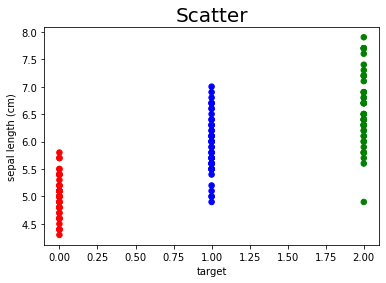

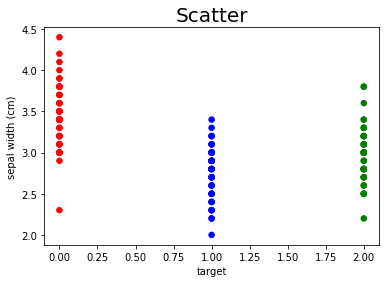

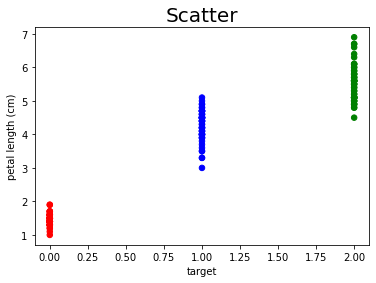

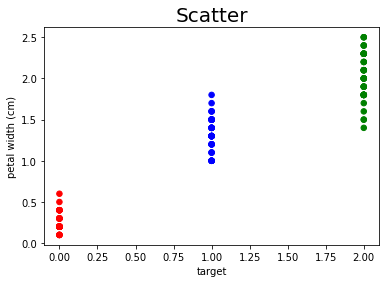

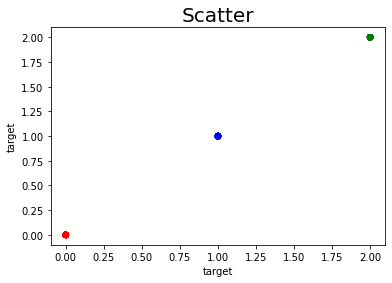

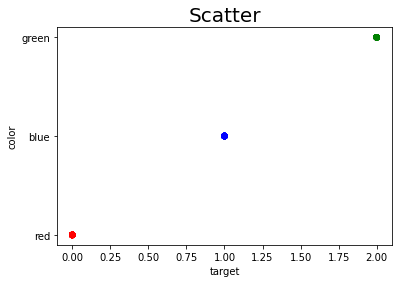

In [58]:
y_list = df_ex.columns

for i in range(0, len(y_list)):
    df_ex.plot(kind='scatter',x='target',y=y_list[i],s=30, c=df_ex['color'])
    plt.title('Scatter', fontsize=20)
    plt.xlabel('target')
    plt.ylabel(y_list[i])
    plt.show()

#### <b>corr() 상관관계를 활용한 데이터 분석 실습</b>
---

In [59]:
df.corr()

,url_len,url_num_hyphens_dom,url_num_dom_token,url_path_len,url_filename_len,url_longest_dom_token_len,url_average_dom_token_len,url_tld,url_domain_len,url_hostname_len,...,html_num_tags('form'),html_num_tags('a'),html_num_tags('small'),html_num_tags('span'),html_num_tags('input'),html_num_tags('applet'),html_num_tags('img'),html_num_tags('video'),html_num_tags('audio'),Result_v1
url_len,1.000000,-0.018826,0.007159,0.928855,0.853502,0.009957,-0.005096,0.064684,0.022298,0.023144,...,-0.021693,-0.021209,-0.009248,-0.007828,-0.019711,NaN,-0.026172,-0.028280,-0.010812,-0.005050
url_num_hyphens_dom,-0.018826,1.000000,-0.099878,-0.094444,-0.058208,0.667767,0.652332,0.138996,0.591350,0.592306,...,0.043228,-0.038565,-0.020827,-0.021724,0.116698,NaN,-0.016538,-0.020545,-0.005942,-0.362520
url_num_dom_token,0.007159,-0.099878,1.000000,-0.004212,0.019974,-0.182165,-0.367355,-0.307448,0.262989,0.254906,...,-0.093271,0.014906,-0.010366,0.004177,-0.043290,NaN,0.018720,-0.026602,-0.007597,0.242202
url_path_len,0.928855,-0.094444,-0.004212,1.000000,0.922102,-0.099296,-0.113473,0.035808,-0.107595,-0.106889,...,-0.031213,-0.010427,-0.003386,-0.001565,-0.045434,NaN,-0.012145,-0.026002,-0.009325,0.103433
url_filename_len,0.853502,-0.058208,0.019974,0.922102,1.000000,-0.061724,-0.075684,0.018670,-0.060335,-0.060494,...,-0.036838,-0.005430,-0.001015,-0.000507,-0.035787,NaN,-0.004678,-0.014869,-0.012010,0.118624
url_longest_dom_token_len,0.009957,0.667767,-0.182165,-0.099296,-0.061724,1.000000,0.941963,0.276265,0.858045,0.860118,...,0.064505,-0.051552,-0.022676,-0.029898,0.131299,NaN,-0.059097,-0.002912,-0.008084,-0.509985
url_average_dom_token_len,-0.005096,0.652332,-0.367355,-0.113473,-0.075684,0.941963,1.000000,0.289709,0.761543,0.764301,...,0.084927,-0.050408,-0.023859,-0.029085,0.144006,NaN,-0.049020,0.001595,-0.004599,-0.534915
url_tld,0.064684,0.138996,-0.307448,0.035808,0.018670,0.276265,0.289709,1.000000,0.171360,0.184784,...,0.066734,0.022512,0.015312,0.016413,0.064137,NaN,0.001630,-0.001935,-0.006469,-0.195497
url_domain_len,0.022298,0.591350,0.262989,-0.107595,-0.060335,0.858045,0.761543,0.171360,1.000000,0.999038,...,0.030835,-0.035988,-0.026944,-0.024162,0.123565,NaN,-0.031024,-0.011716,-0.003609,-0.383381
url_hostname_len,0.023144,0.592306,0.254906,-0.106889,-0.060494,0.860118,0.764301,0.184784,0.999038,1.000000,...,0.033727,-0.034985,-0.026499,-0.023610,0.125276,NaN,-0.029755,-0.011680,-0.004364,-0.387142


In [85]:
#df.corr()['Result_v1'].sort_values(ascending=True) #내가 작성한 코드여..
df.corr()['Result_v1'].sort_values(ascending=False)

Result_v1                    1.000000
url_num_dom_token            0.242202
html_num_tags('script')      0.205229
html_num_tags('img')         0.139923
url_num_percent              0.122109
url_filename_len             0.118624
html_num_tags('a')           0.115747
url_num_underscores          0.114572
html_num_tags('embed')       0.104836
url_path_len                 0.103433
html_num_tags('object')      0.103065
url_num_digits               0.077680
url_ip_present               0.070428
html_num_tags('div')         0.063874
html_num_tags('span')        0.053305
html_num_tags('iframe')      0.042297
url_num_dots                 0.039950
html_num_tags('small')       0.022192
html_num_tags('audio')       0.013208
html_num_tags('video')       0.006198
url_port                     0.004197
url_num_plus                 0.000479
url_len                     -0.005050
html_num_tags('head')       -0.035772
url_num_semicolon           -0.064152
url_num_at                  -0.076415
html_num_tag

#### <b>scatter 그래프를 활용한 데이터 분석 실습<AssertionError>
---

In [68]:
import matplotlib.pyplot as plt

In [69]:
# 1 = 'blue',-1 = 'red' 처리
df['color'] = df['Result_v1'].map({1:"blue", -1:"red"}) #작성한 코드

# 참고한 코드
#df_ex['color'] = df_ex['target'].map({0:"red", 1:"blue", 2:"green"})
#y_list = df_ex.columns

#for i in range(0, len(y_list)):
#    df_ex.plot(kind='scatter',x='target',y=y_list[i],s=30, c=df_ex['color'])
#    plt.title('Scatter', fontsize=20)
#    plt.xlabel('target')
#    plt.ylabel(y_list[i])
#    plt.show()

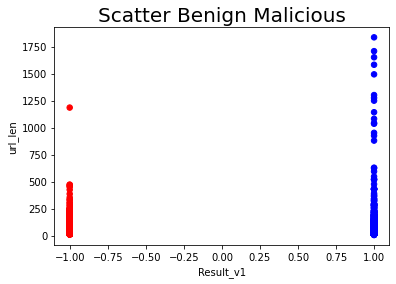

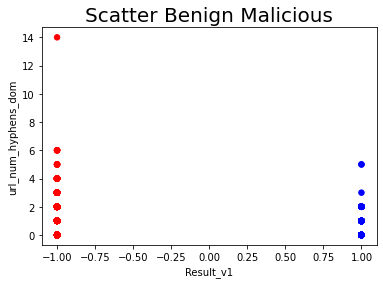

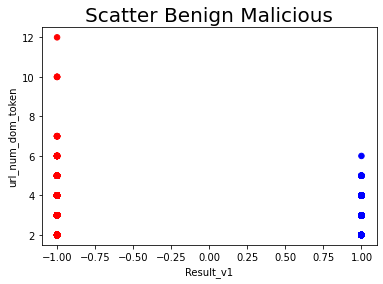

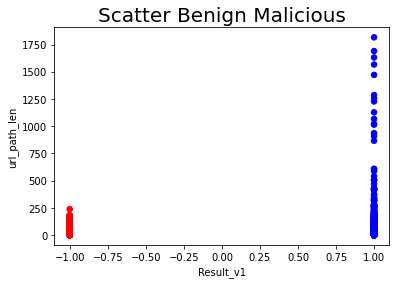

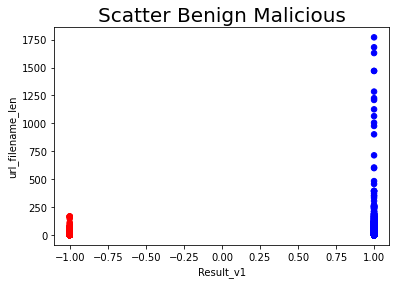

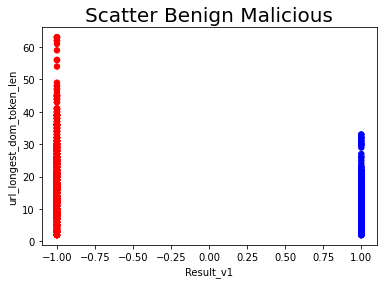

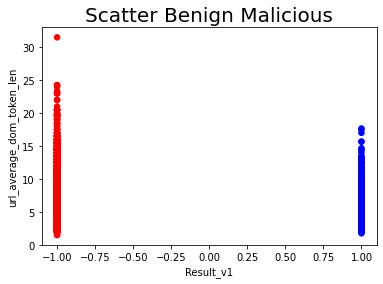

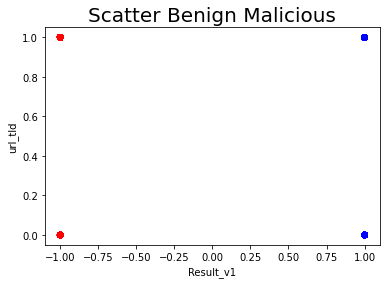

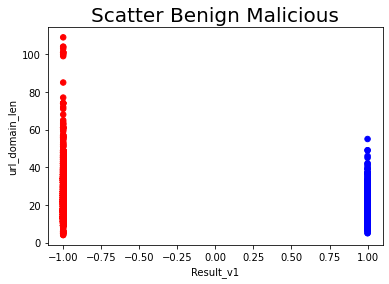

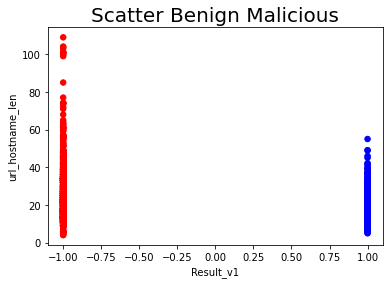

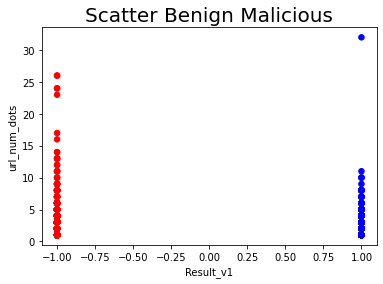

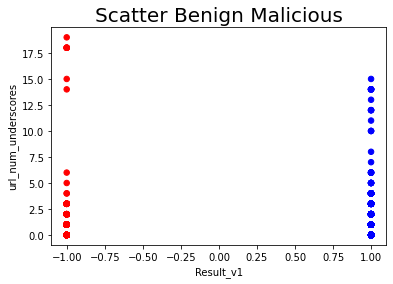

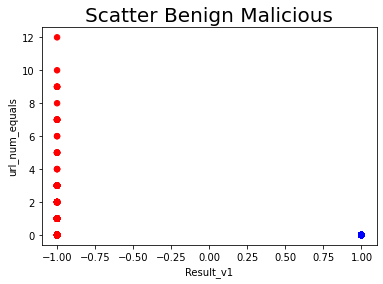

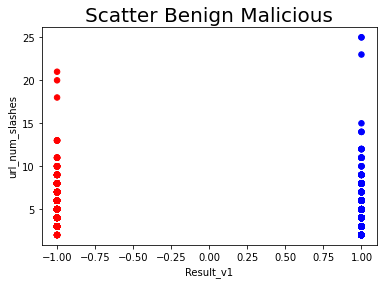

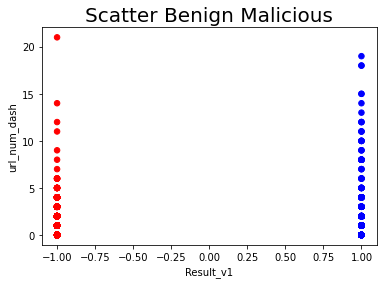

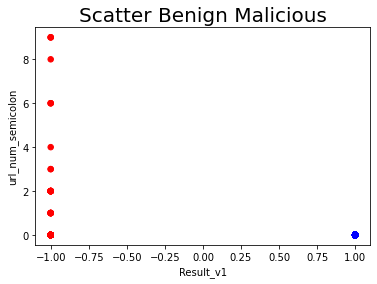

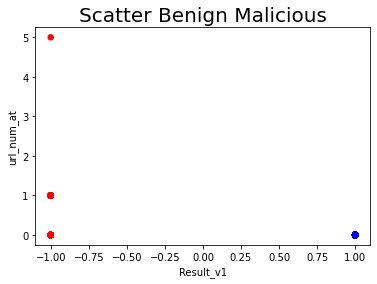

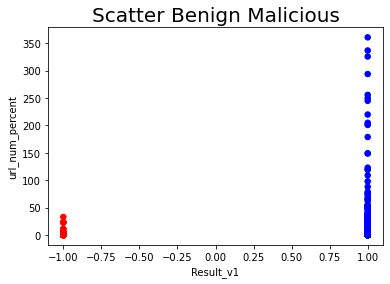

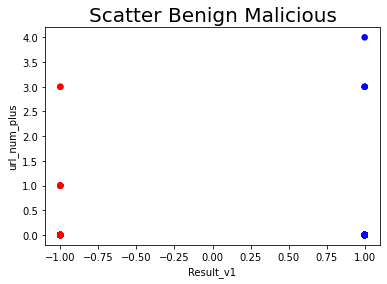

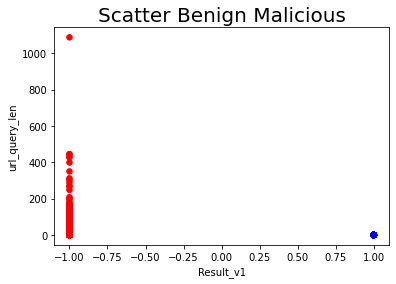

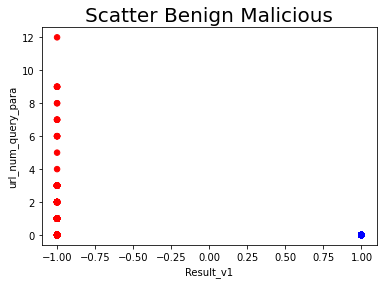

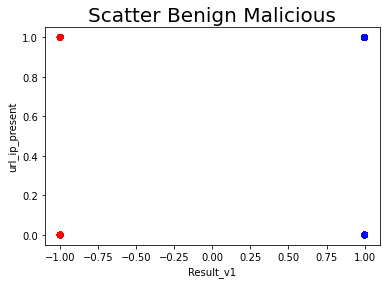

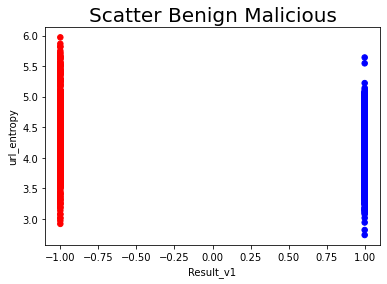

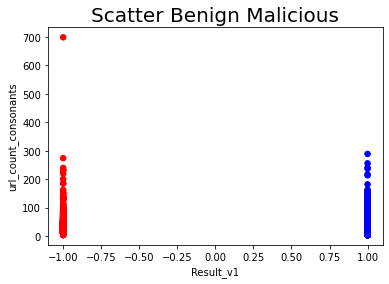

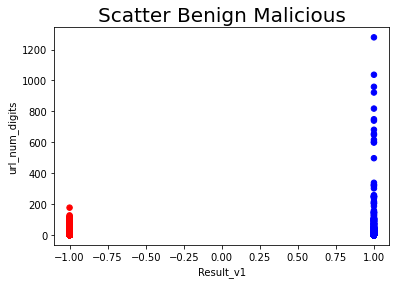

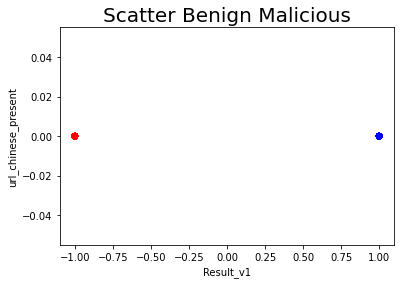

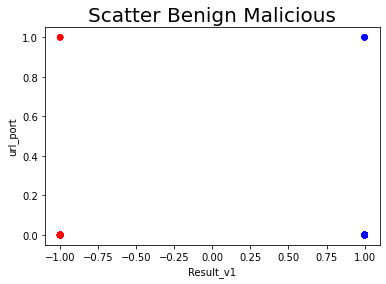

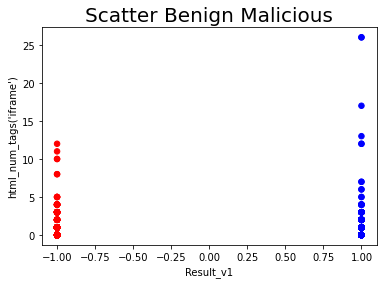

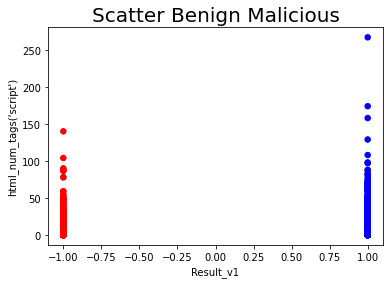

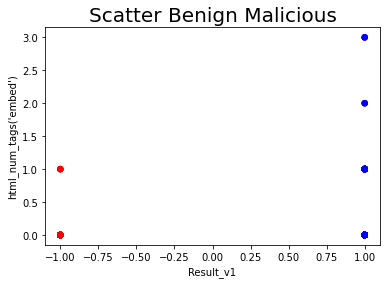

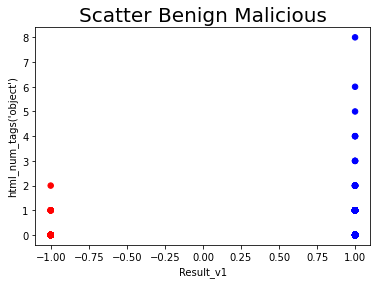

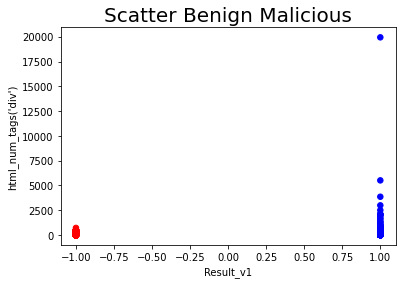

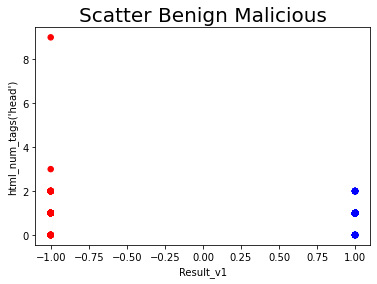

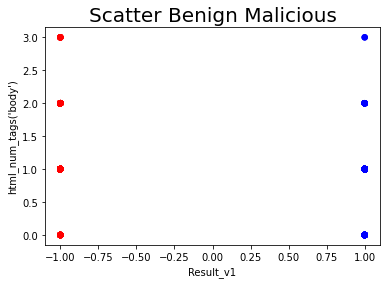

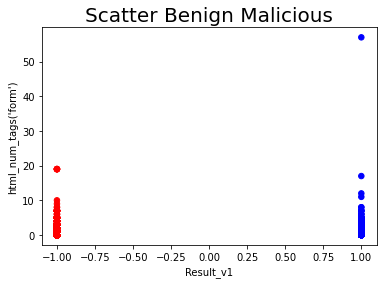

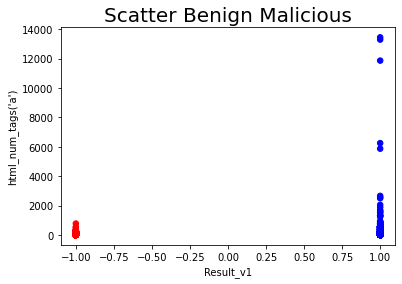

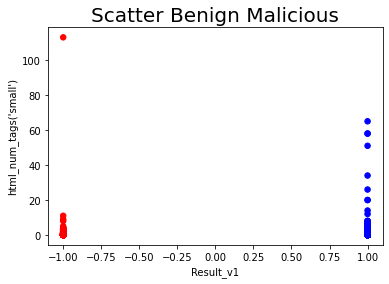

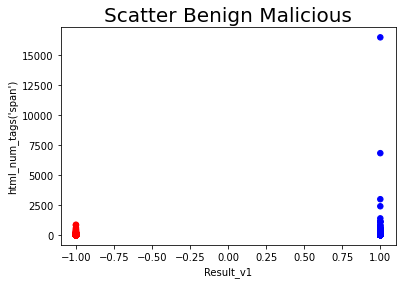

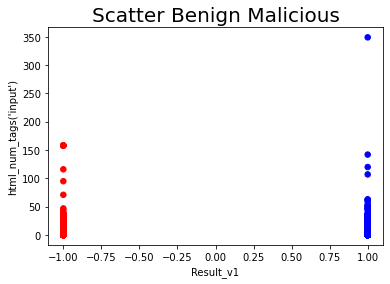

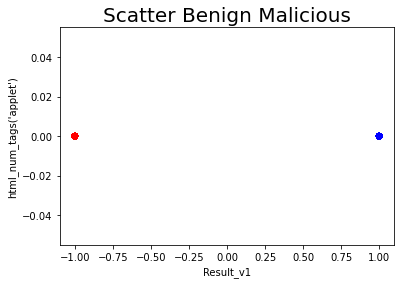

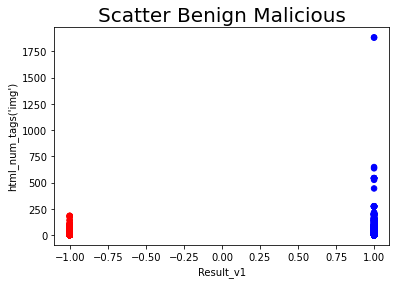

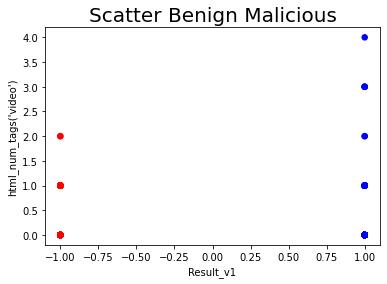

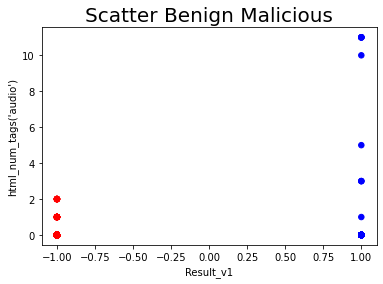

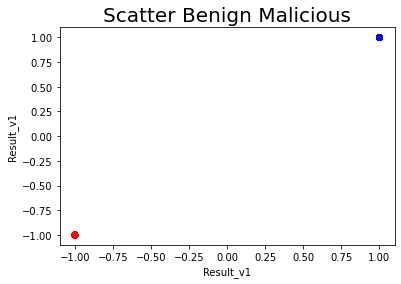

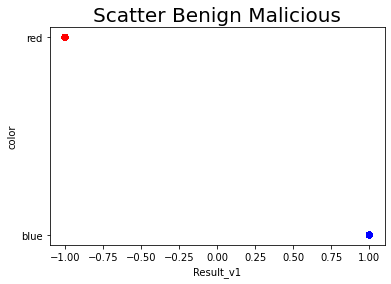

In [70]:
y_list = df.columns

for i in range(0, len(y_list)):
    df.plot(kind='scatter',x='Result_v1',y=y_list[i],s=30, c=df['color']) #작성한 코드
    plt.title('Scatter Benign Malicious', fontsize=20)
    plt.xlabel('Result_v1')
    plt.ylabel(y_list[i])
    plt.show()

#### <b>불필요한 컬럼 제거</b>
---

In [86]:
df.drop(columns=["url_chinese_present","html_num_tags('applet')"],inplace=True)

KeyError: '[\'url_chinese_present\' "html_num_tags(\'applet\')"] not found in axis'

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5189 entries, 0 to 5999
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   url_len                    5189 non-null   int64  
 1   url_num_hyphens_dom        5189 non-null   int64  
 2   url_num_dom_token          5189 non-null   float64
 3   url_path_len               5189 non-null   float64
 4   url_filename_len           5189 non-null   int64  
 5   url_longest_dom_token_len  5189 non-null   int64  
 6   url_average_dom_token_len  5189 non-null   float64
 7   url_tld                    5189 non-null   int64  
 8   url_domain_len             5189 non-null   float64
 9   url_hostname_len           5189 non-null   int64  
 10  url_num_dots               5189 non-null   int64  
 11  url_num_underscores        5189 non-null   float64
 12  url_num_equals             5189 non-null   float64
 13  url_num_slashes            5189 non-null   float

## Q5. train_test_split을 이용하여, train_x, val_x, train_y, val_y로 데이터 분리
---

- test_size = 0.3
- random_state = 2021

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X = df.iloc[:,0:len(df.columns)-1].values
y = df.iloc[:,len(df.columns)-1].values

In [88]:
# train_test_split 사용
train_x, val_x, train_y, val_y = train_test_split(X, y,test_size=0.3,random_state=2021) #작성한 코드

#random_state은 의미없는 값이라는데?

In [89]:
train_x.shape, val_x.shape, train_y.shape, val_y.shape

#shape로 컬럼수 확인이나, 데이터 배분을 확인해 보는것이 좋습니다.

((3632, 42), (1557, 42), (3632,), (1557,))